# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
current_btc_price = requests.get(btc_url).json()
current_btc_value = current_btc_price['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
# YOUR CODE HERE!
current_eth_price = requests.get(eth_url).json()
current_eth_value = current_eth_price['data']['1027']['quotes']['CAD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = current_btc_value * my_btc     
my_eth_value = current_eth_value * my_eth    


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $84230.65
The current value of your 5.3 ETH is $11871.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
shares_data = {
    "shares": [50, 200]
}

tickers = ["SPY", "AGG"]
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
SPY,50
AGG,200


In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-03-15", tz="America/New_York").isoformat() 


# Set the tickers
tickers = ["SPY","AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!


df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2021-03-15 00:00:00-04:00  113.6  114.01  113.6  113.94  4210749  394.33   

                                                              
                              high     low   close    volume  
time                                                          
2021-03-15 00:00:00-04:00  396.685  392.03  396.47  64471980

In [11]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_portfolio["AGG"]["close"][0]  
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.94
Current SPY closing price: $396.47


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19823.50
The current value of your 200 AGG shares is $22788.00


### Savings Health Analysis

In [14]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000
crypto_amount = my_btc_value + my_eth_value 
shares_amount = my_spy_value + my_agg_value 

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'amount':[crypto_amount,shares_amount]})
df_savings.rename(index={0: 'crypto', 1: 'shares'}, inplace=True)


# Display savings DataFrame
display(df_savings)

,amount
crypto,96102.589718
shares,42611.500000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='amount'>

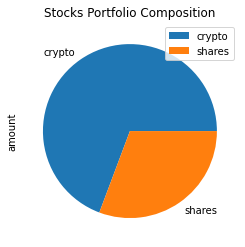

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Stocks Portfolio Composition")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_amount + shares_amount


# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund.") 
elif total_savings == emergency_fund:
    print ("Congratulations! You are reaching this financial goal.")
else:
    print (f"You have ${emergency_fund - total_savings} dollars away from reaching the goal.")  
    


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-14', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-03-23 00:00:00-04:00  108.44  108.51  108.2635  108.450  1920280  233.99   
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110  234.38   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277  231.93   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002  233.27   
2017-03-29 00:00:00-04:00  108.48  108.62  108.4600  108.600  1635068  235.01   

                                                              
                             high      low   close    volume  
time                                                          
2017-03-23 00:00:00-04:00  235.34  233.600  234.01  76534784  
2017-03-24 00:00:00-04:00  235.04  232.960  233.90  82201507  
2017-03-27 00:00:00-04:00  233.92  231.610  233.58  67180329  
2017-03-28 00:00:00-04:00  235.81  233.140  235.27  64554450  
2017-03-29 00:00:00-04:00  235.81  234.725  235.59  40664024

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],   
    num_simulation = 500,
    num_trading_days = 252*30
)


In [29]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_yrs.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2017-03-23 00:00:00-04:00  108.44  108.51  108.2635  108.450  1920280   
2017-03-24 00:00:00-04:00  108.35  108.51  108.3100  108.370  2249110   
2017-03-27 00:00:00-04:00  108.65  108.71  108.5345  108.605  1811277   
2017-03-28 00:00:00-04:00  108.63  108.68  108.3500  108.380  1804002   
2017-03-29 00:00:00-04:00  108.48  108.62  108.4600  108.600  1635068   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-03-23 00:00:00-04:00          NaN  233.99  235.34  233.600  234.01   
2017-03-24 00:00:00-04:00    -0.000738  234.38  235.04  232.960  233.90   
2017-03-27 00:00:00-04:00     0.002168  231.93  233.92  231.610  233.58   
2017-03-28 00:00:00-04:00    -0.002072  233.27  235.81  233.140  235.27   
2017-03-29 00:00:00-04:00     0.002030  235.01  235.81  234.725  235.59   

                                                  
                             volume daily_return  
time                                              
2017-03-23 00:00:00-04:00  76534784          NaN  
2017-03-24 00:00:00-04:00  82201507    -0.000470  
2017-03-27 00:00:00-04:00  67180329    -0.001368  
2017-03-28 00:00:00-04:00  64554450     0.007235  
2017-03-29 00:00:00-04:00  40664024     0.001360

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_yrs.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994226,1.000512,1.003054,1.012574,0.983361,0.996062,0.990664,1.005058,1.022298,1.000092,...,1.001422,0.998981,1.002564,0.986593,1.010785,0.991383,1.003003,1.005595,0.993125,1.002970
2,0.990219,1.016501,1.013149,1.016624,0.973933,0.986422,0.995209,1.008919,1.011931,0.999796,...,1.010100,0.999779,1.008925,0.979202,1.014114,0.990693,1.004066,1.018029,1.004588,1.006017
3,0.996945,1.012753,0.999742,1.018449,0.982142,0.987978,0.990797,1.001221,1.012444,0.992188,...,1.007596,0.981697,1.010476,0.988515,1.000714,1.004264,1.006527,1.024885,1.003100,1.000603
4,1.008580,1.015645,0.997258,1.020092,0.995798,0.997368,0.983759,0.998219,1.018410,0.996904,...,1.011558,0.986916,1.017408,1.001804,1.000620,1.014882,1.002270,1.022764,1.005928,1.011401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.470321,15.013304,18.997182,6.836073,26.312784,18.459911,11.006291,25.292523,19.684114,3.241591,...,10.887326,8.866840,27.629610,29.192788,14.470643,23.695670,10.308221,5.811843,9.972032,50.446066
7557,8.414876,15.134183,18.845123,6.843595,26.524636,18.391099,10.928651,25.176640,19.522312,3.241922,...,11.081911,8.794878,27.381011,29.014802,14.489798,23.999340,10.215862,5.866432,10.054400,50.800084
7558,8.222787,15.177006,18.965411,6.852374,26.351969,18.427626,10.854242,25.172316,19.384922,3.232865,...,11.086692,8.836348,27.474608,29.440910,14.479748,24.056161,10.363584,5.862522,9.963042,51.350647
7559,8.212800,15.262674,18.931240,6.879879,26.455627,18.546440,10.816839,25.061755,19.128033,3.267400,...,11.124676,8.832317,27.541595,29.273833,14.443007,24.249716,10.298163,5.901153,10.013751,51.138011


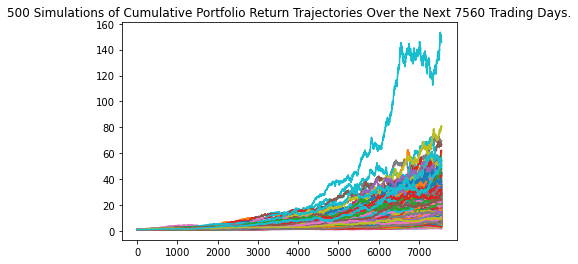

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30_yrs.plot_simulation()

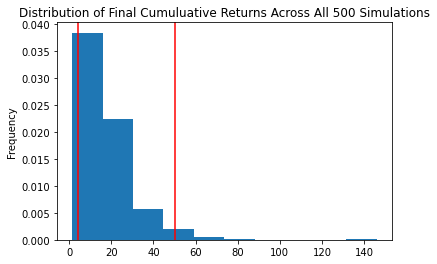

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30_yrs.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_30_yrs.summarize_cumulative_return()  

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)   

count           500.000000
mean             17.770060
std              13.011800
min               1.431855
25%               9.166482
50%              14.776949
75%              22.409954
max             145.859862
95% CI Lower      3.970650
95% CI Upper     50.223337
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000  

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2) 
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $79413.0 and $1004466.74


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5   

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment ,2)
ci_upper = round(even_tbl[9]*initial_investment ,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $119119.5 and $1506700.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],   
    num_simulation = 500,
    num_trading_days = 252*5
)


In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002684,0.998871,1.004253,1.004823,1.000299,0.997127,0.991975,1.003945,0.996016,1.003775,...,1.001271,0.998388,1.002030,1.001679,0.993720,1.004088,0.997512,0.998885,1.003365,1.000915
2,1.002012,0.998055,1.006639,1.005857,0.991058,1.000559,0.994779,1.008197,0.999530,1.001225,...,1.000596,0.997463,0.999228,1.005325,0.991535,1.008120,0.999920,1.000999,1.011793,0.989247
3,1.005132,0.996218,1.009164,1.005076,0.988259,1.001853,0.994346,1.004802,0.998777,0.999076,...,0.999396,1.002208,0.997916,1.005419,0.991158,1.005821,1.000509,1.001746,1.012392,0.989466
4,1.007935,0.997054,1.008998,1.006914,0.983774,1.003943,0.997597,1.006250,0.997714,1.000933,...,1.001778,1.002630,1.000568,1.006588,0.996494,1.007056,1.002702,0.993844,1.006697,0.990913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.033987,1.265877,1.400683,1.037583,1.155444,1.201457,1.280090,1.378770,1.139356,1.114505,...,1.074574,1.250085,1.157126,1.468498,1.206585,1.135545,1.359614,1.360956,1.388137,0.962107
1257,1.028056,1.263266,1.392917,1.041870,1.155918,1.200177,1.282847,1.375344,1.141751,1.115172,...,1.082478,1.247177,1.161955,1.476162,1.208656,1.141300,1.360949,1.352087,1.383958,0.961973
1258,1.029659,1.261372,1.395914,1.042305,1.155144,1.201588,1.287840,1.381641,1.140678,1.119746,...,1.080988,1.250032,1.165099,1.478192,1.207784,1.145953,1.355768,1.346596,1.382791,0.960718
1259,1.035001,1.260937,1.402988,1.034949,1.158527,1.207634,1.296620,1.383403,1.141871,1.121288,...,1.079828,1.237239,1.169768,1.470859,1.206196,1.150810,1.365331,1.348074,1.384698,0.956318


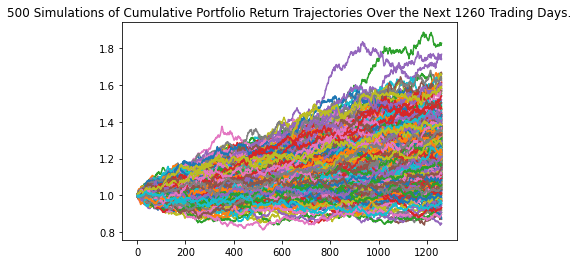

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5yrs.plot_simulation()

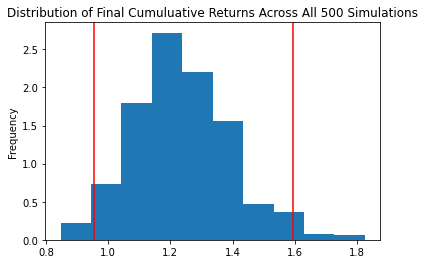

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
att_dist_plot = MC_5yrs.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
att_5yrs = MC_5yrs.summarize_cumulative_return()


# Print summary statistics
# YOUR CODE HERE!
print(att_5yrs)   

count           500.000000
mean              1.235884
std               0.158793
min               0.846950
25%               1.125589
50%               1.222739
75%               1.335474
max               1.825401
95% CI Lower      0.953135
95% CI Upper      1.595275
Name: 1260, dtype: float64


In [46]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(att_5yrs[8]*initial_investment,2)
ci_upper_five = round(att_5yrs[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57188.12 and $95716.51


### Ten Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],  
    num_simulation = 500,
    num_trading_days = 252*10
)


In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003635,1.002920,1.005525,0.999305,0.997942,0.994072,0.995401,0.994705,0.994953,0.999416,...,0.994206,0.999698,0.997625,1.002264,1.001004,1.003132,1.008440,1.005634,0.993884,1.006412
2,0.997450,0.999628,1.005594,0.996702,1.000841,0.997727,0.996629,0.987751,0.995095,1.005242,...,0.994196,0.999461,0.997810,0.996810,1.004413,1.001832,1.012638,1.006711,1.001867,1.005113
3,1.001026,0.996124,1.000567,0.995287,0.996703,1.005838,0.997594,0.984457,0.998504,1.008438,...,0.990729,1.000080,0.996016,0.986217,0.999179,0.998107,1.011900,1.002784,0.993671,1.006527
4,0.996758,0.991186,1.003155,0.999447,0.998942,1.002487,0.991604,0.982466,0.999915,1.004743,...,0.985616,0.995009,1.000646,0.988216,0.998157,1.002706,1.007481,1.001514,0.996553,1.014916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.131653,2.297267,1.383930,1.727977,0.934156,1.743211,1.723271,1.623453,1.685777,1.751981,...,2.058518,1.480710,1.698408,1.511793,1.074949,1.172578,1.388148,1.649463,1.619223,1.537555
2517,1.128311,2.309304,1.380103,1.736037,0.929684,1.744936,1.726195,1.619435,1.686364,1.747188,...,2.057167,1.483826,1.712541,1.531679,1.066235,1.167171,1.382321,1.658768,1.619411,1.548746
2518,1.128465,2.291349,1.380541,1.736691,0.929401,1.751097,1.720061,1.614438,1.688831,1.748160,...,2.058957,1.489124,1.720342,1.533851,1.063697,1.174637,1.378858,1.658286,1.625235,1.547546
2519,1.129215,2.284447,1.385357,1.734700,0.924215,1.765021,1.709597,1.609070,1.686101,1.748717,...,2.054096,1.496454,1.713581,1.532978,1.064019,1.174678,1.382576,1.651051,1.620253,1.541939


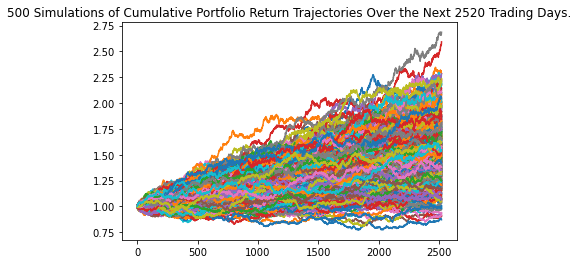

In [49]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10yrs.plot_simulation()

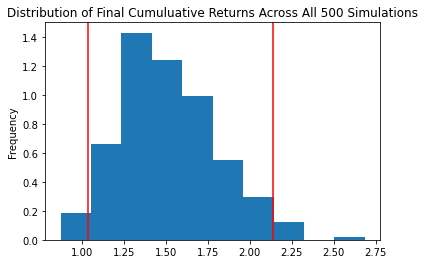

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10yrs.plot_distribution()   

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_10yrs = MC_10yrs.summarize_cumulative_return()


# Print summary statistics
# YOUR CODE HERE!
print(even_10yrs)

count           500.000000
mean              1.515355
std               0.286988
min               0.871028
25%               1.316976
50%               1.481667
75%               1.691884
max               2.685585
95% CI Lower      1.035011
95% CI Upper      2.135785
Name: 2520, dtype: float64


In [52]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_10yrs[8]*initial_investment,2)
ci_upper_ten = round(even_10yrs[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62100.67 and $128147.09
